<a href="https://colab.research.google.com/github/4leen/Uber-and-Lyft-Project/blob/main/Uber_and_Lyft_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction
In today's fast-paced world, ridesharing services have revolutionized the way we commute. Among the top players in this industry, Uber and Lyft have emerged as the go-to choices for millions of people around the globe. Both platforms offer convenient and efficient transportation solutions, but one key aspect that users often consider is the fare prices. This project aims to provide a comprehensive comparison of Uber and Lyft fares, examining various factors such as weather and hour. This project analyzes data from Uber and Lyft in Boston, MA. 

#Data Source
[Uber and Lyft Dataset](https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma?resource=download)

#Project Scope
The project scope consists of four sections that will facilitate the process and progress. The first section is the project goals, which is to established the objectives and the intentions for this project. The next section is the data that we are going to evaluate to fulfill the project goals. The third section is the analysis, which involves determining the methods and aligning the research question with the project goals. Finally, the evaluation section will help constructing conclusions and findings from the analysis.
##*Project Goals*
  In this project, the objectives is to explore and compare the distributions and characteristics of weather and hour to fares for Uber and Lyft. This is important as we can gain insights into the similarities, differences, and overall value offered by these two prominent ridesharing services. 
##*Data*
  The project has one data set found from Kaggle [Uber and Lyft Dataset](https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma?resource=download). In the data, each row represents a user of Uber or Lyft and the columns are the data of their trip using the platform.
##*Analysis*
  The method we are going to use is comparing the distribution of Uber and Lyft fares using boxplots. Boxplots are useful to compare data set of Uber and Lyft because they provide a visual representation of the distribution and key statistical measures of the data. Boxplots help in visually summarizing and interpreting the characteristics of the data, making them a valuable tool for data analysis and comparison. 
##*Evaluation*
  The project will conclude with the evaluation of two boxplots (weather and hour to price) for Uber and Lyft. The output should able to provide the results of comparing the two ridesharing services.

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load CSV File

In [3]:
data = pd.read_csv("drive/MyDrive/project/rideshare_kaggle.csv")

#Exploratory Data Analysis


In [4]:
print("Columns in data: {}\n".format(data.columns))
print("Data shape: {}\n" .format(data.shape))
print(data.head())

Columns in data: Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       

Preparing the Data 

In [5]:
# Check if there is data missing
print("Number of price data missing: {}\n".format(np.sum(data["price"].isna())))
print("Number of weather data missing: {}\n".format(np.sum(data["icon"].isna())))
print("Number of hour data missing: {}\n".format(np.sum(data["hour"].isna())))
# Found that some data has no price, need to filter those out
data = data[np.invert(data["price"].isna())]

#Check the data type
print("The type of price data is: {}\n".format(data["price"].dtypes))
print("The type of icon data is: {}\n".format(data["icon"].dtypes))
print("The type of hour data is: {}\n".format(data["hour"].dtypes))
# Convert categorical values to label encoding
data["icon"] = data["icon"].astype("category")
data["icon_cat"] = data["icon"].cat.codes

Number of price data missing: 55095

Number of weather data missing: 0

Number of hour data missing: 0

The type of price data is: float64

The type of icon data is: object

The type of hour data is: int64



In [6]:
# Separate out data from Uber and Lyft
uber_data = data[data["cab_type"] == "Uber"]
lyft_data = data[data["cab_type"] == "Lyft"]

print("Number of Uber data: {}".format(data[data["cab_type"] == "Uber"].shape))
print("Number of Lyft data: {}".format(data[data["cab_type"] == "Lyft"].shape))

Number of Uber data: (330568, 58)
Number of Lyft data: (307408, 58)


### Histogram of Price for Uber vs Lyft

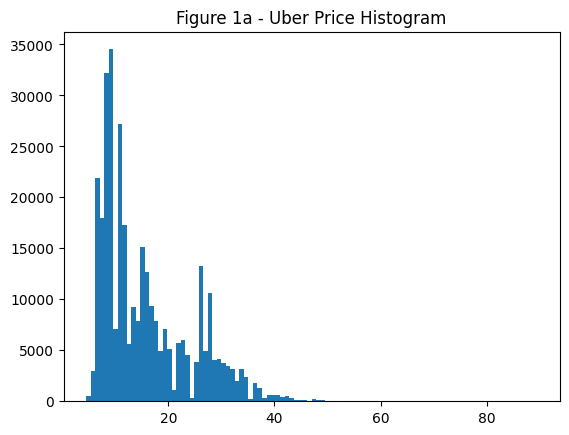

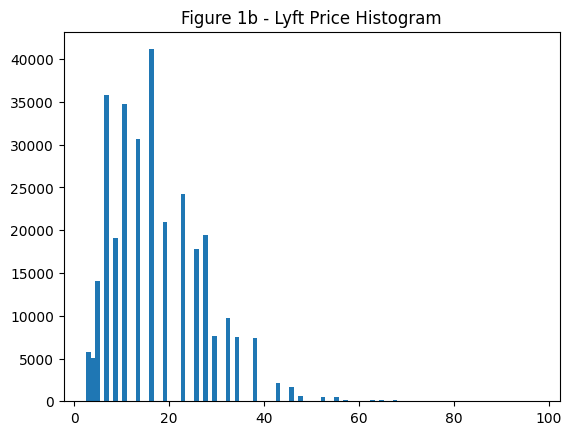

In [7]:
# Plot histogram for Uber
uber_histogram_figure = plt.figure("Figure 1a - Uber Price Histogram")
plt.hist(uber_data["price"], bins = 100)
plt.title("Figure 1a - Uber Price Histogram")

#Plot histogram for Lyft

lyft_histogram_figure = plt.figure("Figure 1b - Lyft Price Histogram")
plt.hist(lyft_data["price"], bins = 100)
plt.title("Figure 1b - Lyft Price Histogram")

# Show Plot
plt.show()

In [8]:
print("Descriptive Statistics for Uber Price")
print(uber_data["price"].describe())
print("======")
print("Descriptive Statistics for Lyft Price")
print(lyft_data["price"].describe())

Descriptive Statistics for Uber Price
count    330568.000000
mean         15.795343
std           8.560300
min           4.500000
25%           9.000000
50%          12.500000
75%          21.500000
max          89.500000
Name: price, dtype: float64
Descriptive Statistics for Lyft Price
count    307408.000000
mean         17.351396
std          10.019171
min           2.500000
25%           9.000000
50%          16.500000
75%          22.500000
max          97.500000
Name: price, dtype: float64


Based on the descriptive statistics, we can conclude that on average Lyft prices are slightly higher than Uber prices. However, both Uber and Lyft prices shows variability, with Lyft prices showing slightly higher variation. The quartiles indicate that the middle 50% of prices for both services have similar ranges, but Lyft prices have a slightly higher median. The maximum prices observed for both services are relatively high, indicating the possibility of premium or surge pricing in certain situations.

##Boxplot of Weather-Price for Uber vs Lyft

In [9]:
print(pd.unique(uber_data["icon_cat"]))

[2 1 4 6 5 0 3]


Text(0.5, 1.0, 'Figure 2b - Lyft Price Boxplot Per Icon')

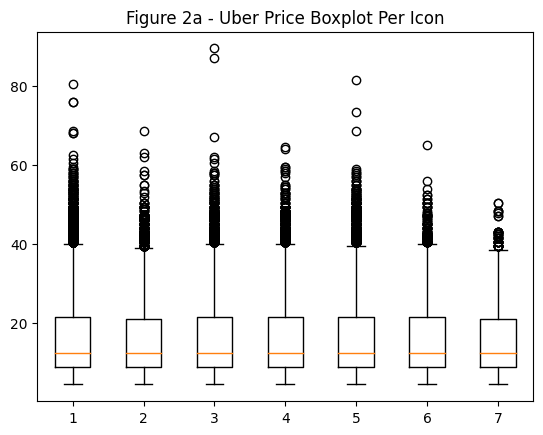

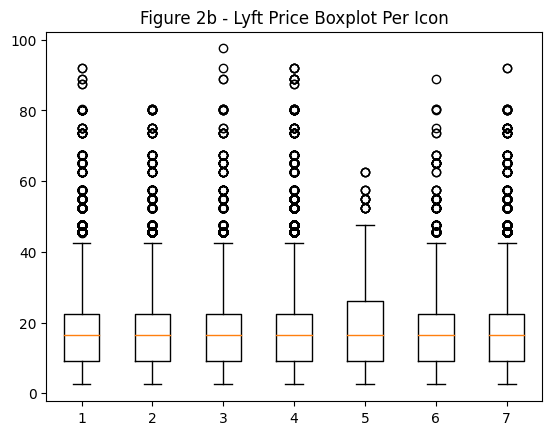

In [10]:
#Creates boxplot for price per icon
#Uber boxplot
uber_data_per_icon = [uber_data[uber_data["icon_cat"] == icon]["price"] for icon in pd.unique(uber_data["icon_cat"])]
uber_boxplot_figure = plt.figure("Figure 2a - Uber Price Boxplot Per Icon")
plt.boxplot(uber_data_per_icon)
plt.title("Figure 2a - Uber Price Boxplot Per Icon")
#Lyft boxplot
lyft_data_per_icon = [lyft_data[lyft_data["icon_cat"] == icon]["price"] for icon in pd.unique(lyft_data["icon_cat"])]
lyft_boxplot_figure = plt.figure("Figure 2b - Lyft Price Boxplot Per Icon")
plt.boxplot(lyft_data_per_icon)
plt.title("Figure 2b - Lyft Price Boxplot Per Icon")

##Boxplot of Hour-Price for Uber vs Lyft

In [11]:
print(pd.unique(data["hour"]))

[ 9  2  1  4  3 18  5 19  6 10 16 22 23  0 11  7 20 13 14  8 12 21 17 15]


Text(0.5, 1.0, 'Figure 3b - Lyft Price Boxplot Per Hour')

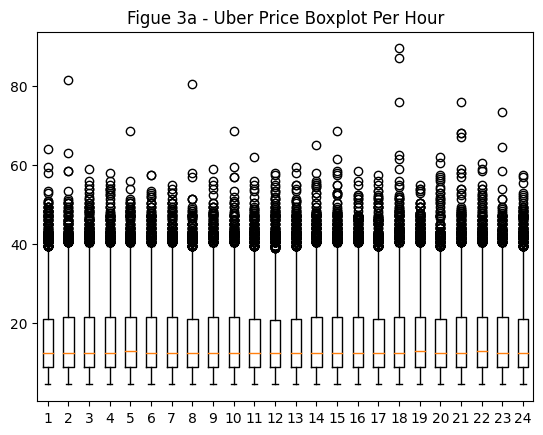

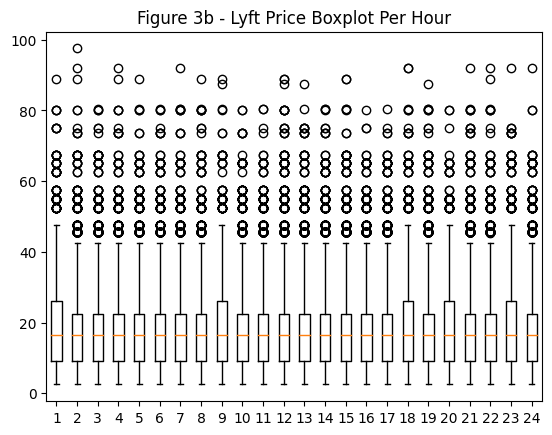

In [12]:
#Creates boxplot for price per hour
#Uber boxplot
uber_data_per_hour = [uber_data[uber_data["hour"] == hour]["price"] for hour in range(24)]
uber_boxplot_figure = plt.figure("Figure 3a - Uber Price Boxplot Per Hour")
plt.boxplot(uber_data_per_hour)
plt.title("Figue 3a - Uber Price Boxplot Per Hour")

#Lyft  boxplot
lyft_data_per_hour = [lyft_data[lyft_data["hour"] == hour]["price"] for hour in range (24)]
lyft_boxplot_figure = plt.figure("Figure 3b - Lyft Price Boxplot Per Hour")
plt.boxplot(lyft_data_per_hour)
plt.title("Figure 3b - Lyft Price Boxplot Per Hour")

#Summary of Analysis
According to the boxplots, Uber fares remain consistent and are not influenced by weather conditions as well as the hour, as indicated by similar median and distribution across different weather and hour in *Figure 2a* and *Figure 3a*. Meanwhile, Lyft fares exhibit more variability: the box no 5 in *Figure 2b* and some boxes in *Figure 3b* 
have their upper half longer than others. This suggests that the upper half of the data has a wider spread compared to the lower half. Moreover, the boxplot of Uber also seems to has more outliers than Lyft.

#Conclusion
Based on the objectives of this project, which aimed to explore and compare the distributions and characteristics of weather and hour in relation to fares for Uber and Lyft, the following conclusions can be drawn:
The boxplots have provided valuable insights into the behavior of fares for both Uber and Lyft in different weather conditions and hours of the day. The results indicate that Uber fares remain consistent and unaffected by weather conditions and hour of the day. On the other hand, Lyft fares exhibit more variability in response to weather conditions and hour. Additionally, the observation of fewer outliers in the Lyft boxplots compared to Uber suggests that Lyft may have a more controlled pricing structure with fewer extreme values.
The insights gained from this analysis provide valuable information for users and stakeholders in the ridesharing industry. Understanding the distribution and characteristics of fares across different conditions can assist users in making informed decisions about which service to choose based on their preferences and budget. Moreover, this analysis contributes to the overall knowledge about the dynamics of fare pricing in the ridesharing market.
However, it is important to note that this project is based solely on the analysis of boxplots and does not delve into the underlying factors or causality between weather, hour, and fare variability. Further research and analysis using more advanced statistical techniques could provide a deeper understanding of these relationships and their implications for the ridesharing industry.